## Solutions to estimation-sampling individual sprint

## Part 1: Distribution Selection

- Plot a histogram of *January's* rainfall. After evaluating the data
  characteristics, identify which two of candidate distributions below
  would be appropriate models for the data and explain why.

   ```
   - The Poisson and Binomial models are both discrete distributions 
     and so they are not appropriate for fitting the rainfall outcomes, 
     which are measured as continues random variables.

   - Gamma and Normal models could be potentially be used to model the
     continuous rainfall data. The normal distribution suffers from the 
     technical problem that it's support covers the entire real line, i.e., 
     it allows for negative rainfall events; nonetheless, it might still 
     be a serviceable tool/model.  
   ```
   
- Read through the Python code located in `individual_soln.py` and be sure 
  you understand it. The code can be run as follows:

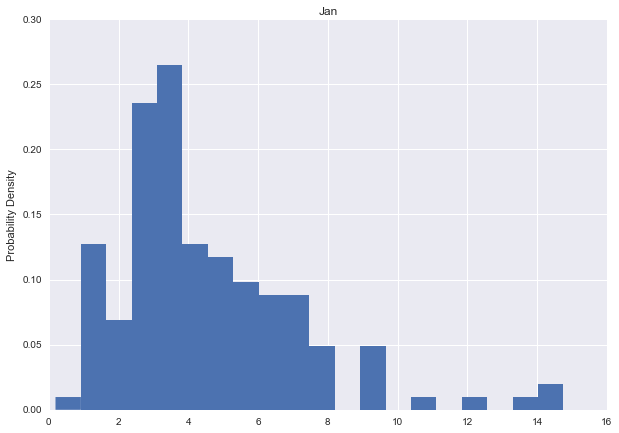

In [59]:
%matplotlib inline
%run individual_soln.py

# Change path to the rainfall data.
df = pd.read_csv('data/rainfall.csv')
plot_hist_basic(df, 'Jan')

## Part 2: Method of Moments
- Applying MOM in a normal distribution population context is very easy since the parameters of the normal distribution -- the mean and the variance -- can be directly set using the sample mean and the sample variance.  For the rainfall data, the sample mean and sample variance can be calculated as in `get_sample_mean_var` in `individual_soln.py`.

In [5]:
print get_sample_mean_var(df, 'Jan')

(4.54457142857143, 6.916774635149025)


- In a gamma distribution population context, the mean and variance are defined as $\mu = \alpha / \beta $ and $\sigma^2 = \alpha / \beta^2$ so we can't directly substitue sample statistics for population parameters; however, it is straight forward to show that the population parameters can be readily estimated by MOM as $\hat{\alpha} = \bar{x}^2 / s^2$ and $\hat{\beta} = \bar{x} / s^2$ where $\bar{x}$ is the sample mean and $s^2$ is the sample variance.

- We can now use these MOM parameter estimates to evaluate the appropriateness of the Normal and Gamma distributions, respectively.  Have a look in `individual_soln.py` to see how the following plot evaluating these distributional choices is created!

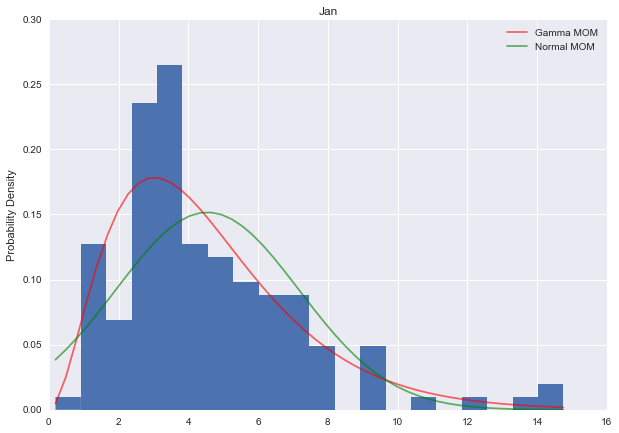

In [11]:
MoM = methond_of_moments()
MoM.fit(df, 'Jan')
MoM.plot_pdf()

- Now that we have fits for one month, let's plot MOM fits for the whole year.

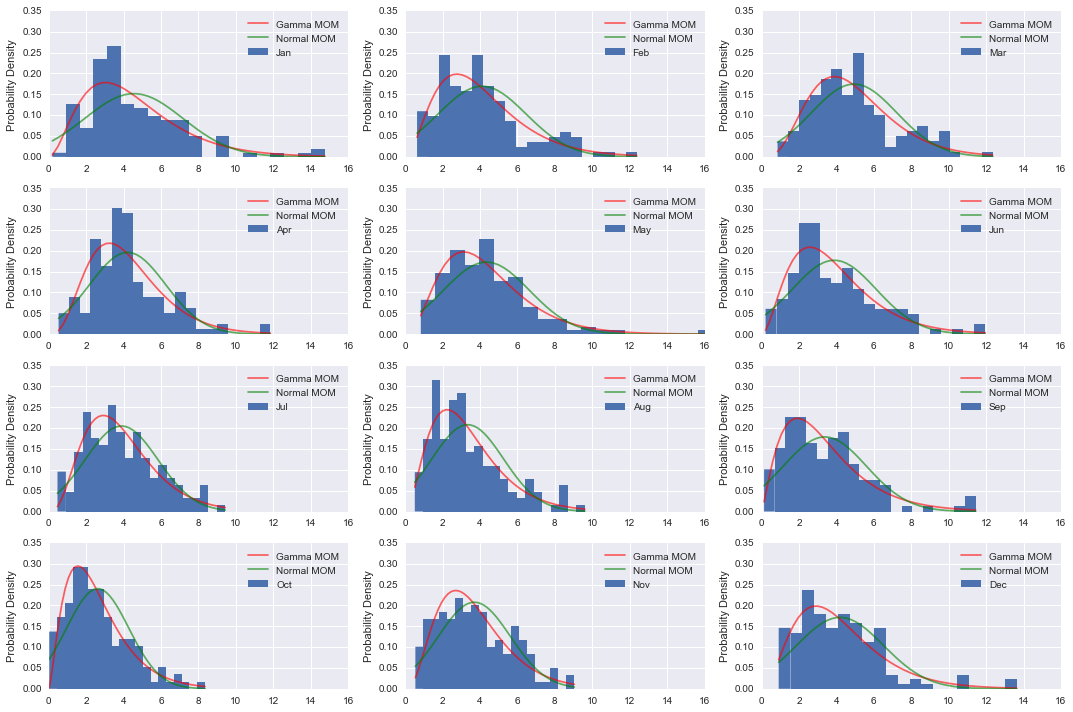

In [14]:
months = df.columns[1:]
plot_year(df, months, [MoM])

## Part 3: Maximum Likelihood Estimation

- The probability of observing *6* events in a given time for a process that follows a Poisson Distribution with rate $\lambda = 5$ (scipy calls this parameter `mu`) is:

In [21]:
print stats.poisson(mu=5).pmf(k=6) 

0.14622280814


- Load in the poisson data and plot the likelihoods for a range of $\lambda$ values (in this case between 1 and 17).

Data: [ 4.  2.  6. ...,  3.  4.  4.]
MLE estimate of lambda = 5.0


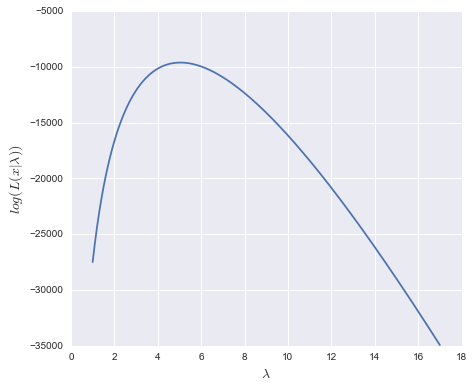

In [23]:
## Change path to poisson.txt:
poisson_vals = np.loadtxt('data/poisson.txt')
print "Data:", poisson_vals

# the choice of 161 datapoints between 1 and 17 gives points spaced out by tenths.
lambda_vals = np.linspace(1, 17, 161)

loglik = likelihood_estimation()
loglik.fit(poisson_vals, lambda_vals)
loglik.plot_likelihood_function()

print "MLE estimate of lambda =", loglik.get_maximum_likelihood_estimate()

- Returning to the rainfall data, plot MLE fits.

sup


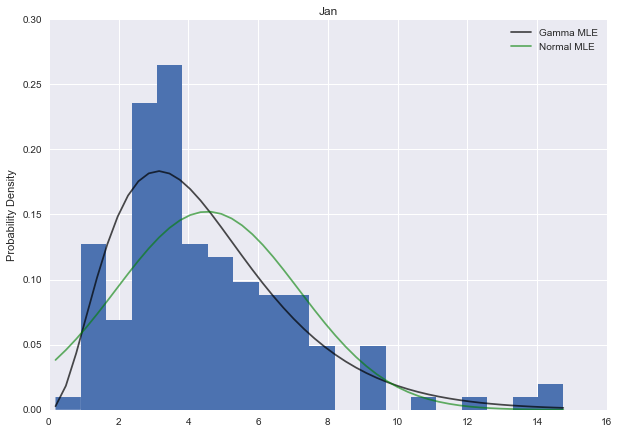

In [60]:
MLE = maximum_likelihood_estimation()
MLE.fit(df, 'Jan')
MLE.plot_pdf()

- Compare the MLE and MOM fits of the Gamma Distribution to the data.

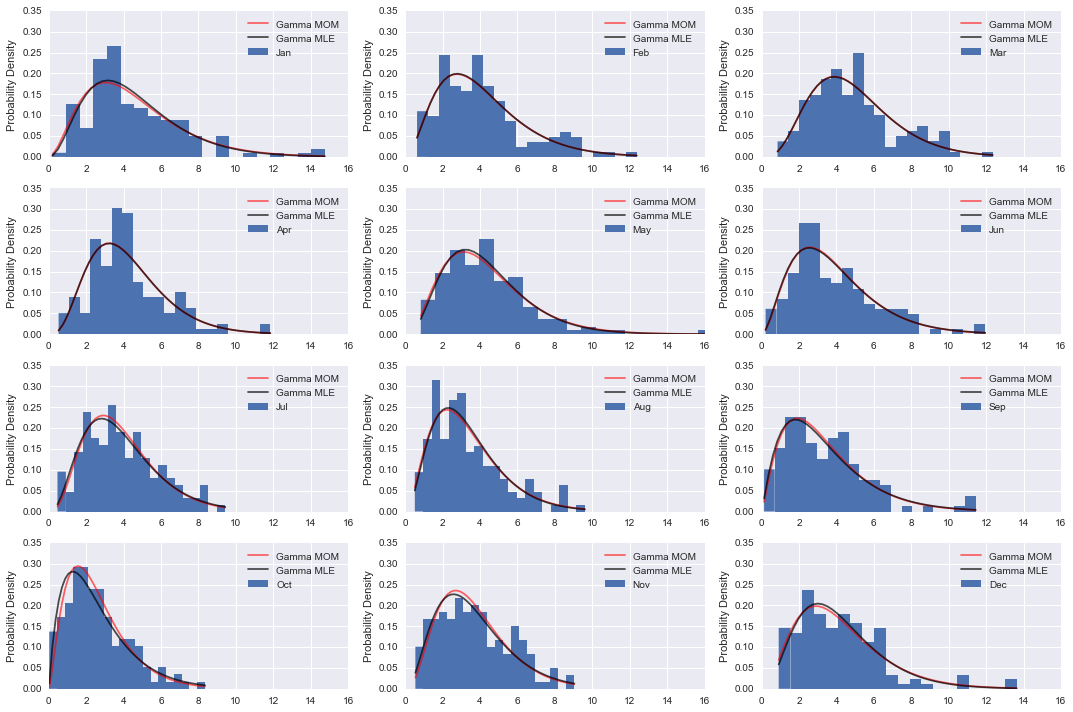

In [61]:
plot_year(df, months, [MoM, MLE], normal=None)

`- We see that the MOM and MLE parameterizations of the Gamma Distribution for the rainfall data are in pretty close agreement. Choosing one over the other wouldn't result in very different estimates, but given the decently large sample size of 140 years of observations, MLE is preferred.`

## Part 4: Non-Parametric Estimation


In [62]:
# create some data
dist1_data = stats.norm.rvs(loc=0, scale=2, size=500)
dist2_data = stats.norm.rvs(loc=4, scale=1, size=500)
bimodal = np.hstack([dist1_data, dist2_data])

# convert to dataframe for code reusability with the rest of the exercise
bimodal_df = pd.DataFrame({'data':bimodal})

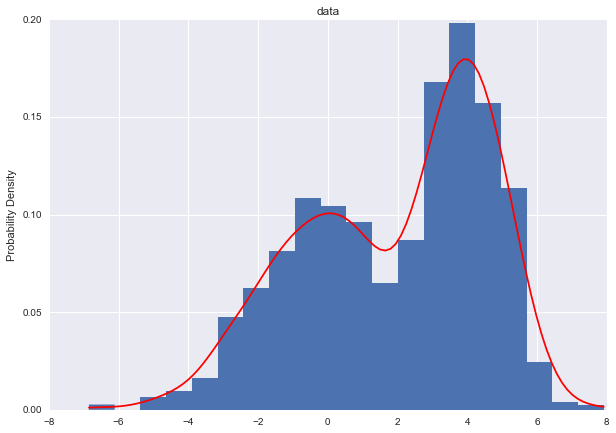

In [63]:
plot_kde(bimodal_df, 'data')


Kernel Density Estimation by its nature is more flexible than fitting a particular distribution to a dataset.  This can be advantageous when you don't know which distribution your data follows (if any), but also means that it can be overly sensitive to fluctuations in the data.  The degree of this sensitivity can be controlled by adjusting the bandwidth of the kernel, which comes with all the usual pluses and minuses of dealing with an additional tuning parameter when fitting data.

A parametric model is usually specificed by a few parameters (e.g. 2 parameters in the gamma distribution). A parametric model often aims to model some underlying mechanism that gives rise to the data observed. The model can be a very poor fit if the wrong parametric form is chosen (i.e. the wrong distribution is chosen).

In a non-parametric model model structure is instead determined from data. Non-parametric models do not attempt to model an underlying mechanism which gives rise to the data observed.

Non-parametric methods are widely used for studying populations that take on a ranked order (such as movie reviews receiving one to four stars). The use of non-parametric methods may be necessary when data have a ranking but no clear numerical interpretation, such as when assessing preferences.
